In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_drug_data_to_load)

clinical_data = pd.read_csv(clinical_trial_data_to_load)

combined_data = pd.merge(mouse_data, clinical_data, on = "Mouse ID")

combined_data.head()
# combined_data.describe()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
dt_group = combined_data.groupby(['Drug', 'Timepoint'])

dt_df = dt_group[["Tumor Volume (mm3)"]].mean()

dt_df.head()

#dt_df.shape

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

Text(0.5,0,'Time (Days)')

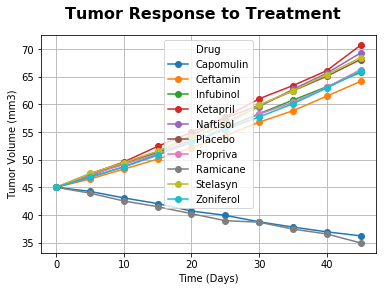

In [4]:
fig, ax = plt.subplots()
fig.suptitle("Tumor Response to Treatment", fontsize=16, fontweight="bold")
                                  
dt_df.groupby(['Timepoint', 'Drug']).mean()['Tumor Volume (mm3)'].unstack().plot(ax=ax, grid = 'on', marker = 'o')

ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")


## Metastatic Response to Treatment

In [5]:
dm_df = dt_group[["Metastatic Sites"]].mean()
dm_df.head()
dm_df.shape

(100, 1)

In [6]:
lim = len(dm_df)

samples = [dm_df.iloc[0:i, 0] for i in range(0, lim)]

sem = [s.sem() for s in samples]
           
sem = pd.DataFrame(sem)

sem.head()
#sem.shape

,0
0,NaN
1,NaN
2,0.080000
3,0.092376
4,0.084592


In [7]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

Text(0.5,0,'Treatment Duration (Days)')

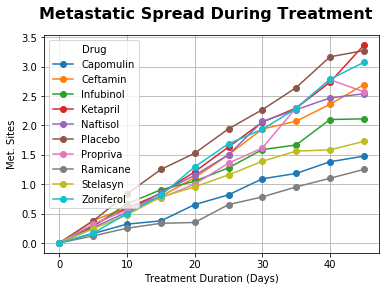

In [8]:
fig, ax = plt.subplots()
fig.suptitle("Metastatic Spread During Treatment", fontsize=16, fontweight="bold")

dm_df.groupby(['Timepoint', 'Drug']).mean()['Metastatic Sites'].unstack().plot(ax=ax, yerr=sem, grid = 'on', marker ='o')

ax.set_ylabel("Met. Sites")
ax.set_xlabel("Treatment Duration (Days)")


## Survival Rates

In [9]:
dmo_df = dt_group[["Mouse ID"]].count()

dmo_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


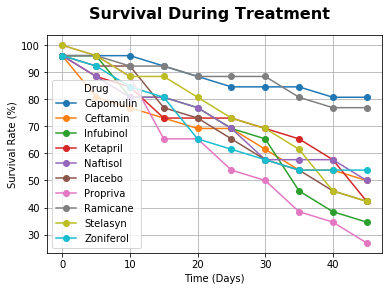

In [11]:
fig, ax = plt.subplots()
fig.suptitle("Survival During Treatment", fontsize=16, fontweight="bold")

#ax.set_xlim(min(time), max(time))
#ax.plot(time, tumorvol, linewidth=1, marker="o")
                                  
mice_data = dmo_df.groupby(['Timepoint', 'Drug']).mean()/26*100
mice_data['Mouse ID'].unstack().plot(ax=ax, grid = 'on', marker = 'o')

ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Time (Days)")


plt.show()

In [13]:
dd = dt_df.loc['Capomulin']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld1 = (dd2-dd1)/dd1*100
print("Drug     percent change of tumor size")
print(f"Capmoulin : {deld1}")
          
dd = dt_df.loc['Ceftamin']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld2 = (dd2-dd1)/dd1*100
print(f"Ceftamin : {deld2}")

dd = dt_df.loc['Infubinol']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld3 = (dd2-dd1)/dd1*100
print(f"Infubinol : {deld3}")

dd = dt_df.loc['Ketapril']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld4 = (dd2-dd1)/dd1*100
print(f"Ketapril : {deld4}")

dd = dt_df.loc['Naftisol']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld5 = (dd2-dd1)/dd1*100
print(f"Naftisol : {deld5}")

dd = dt_df.loc['Placebo']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld6 = (dd2-dd1)/dd1*100
print(f"Placebo : {deld6}")

dd = dt_df.loc['Propriva']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld7 = (dd2-dd1)/dd1*100
print(f"Propriva : {deld7}")

dd = dt_df.loc['Ramicane']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld8 = (dd2-dd1)/dd1*100
print(f"Ramicane : {deld8}")

dd = dt_df.loc['Stelasyn']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld9 = (dd2-dd1)/dd1*100
print(f"Stelasyn : {deld9}")

dd = dt_df.loc['Zoniferol']
dd1 = dd.iloc[0, 0]
dd2 = dd.iloc[9, 0]
deld10 = (dd2-dd1)/dd1*100
print(f"Zoniferol : {deld10}")

Drug     percent change of tumor size
Capmoulin : -19.475302667894173
Ceftamin : 42.51649185589744
Infubinol : 46.12347172785187
Ketapril : 57.028794686606076
Naftisol : 53.92334713476923
Placebo : 51.29796048315153
Propriva : 47.24117486320637
Ramicane : -22.320900462766673
Stelasyn : 52.085134287899024
Zoniferol : 46.57975086509525


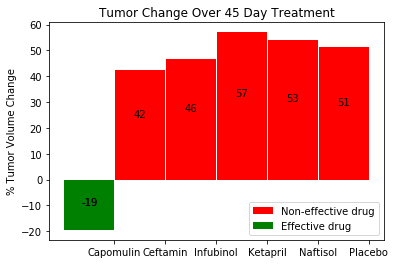

In [15]:
N = 6 # for the first 6 drugs 
drugs = (-19.47, 42.52, 46.58, 57.03, 53.92, 51.30)

ind = np.arange(N)  # the x locations for the groups
width = 0.98       # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, drugs, width, color='r')

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo'))

N = 1
drugs = (-19.47)

ind = np.arange(N)  # the x locations for the groups

rects2 = ax.bar(ind, drugs, width, color='g')

ax.legend((rects1[0], rects2[0]), ('Non-effective drug', 'Effective drug'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.55*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

#Conclusion

#There are two drugs (Capomulin and Ramicane) that are effective in cancer treatment
#Although Stelacyn is efficient in limiting the Metastatic spread, it is rejected as a treatment
#The surviaval rate in the best case scenario is about 80%.
